In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**READING DATA**

In [3]:
train_df=pd.read_csv('NSL_KDD_Train.csv')
test_df=pd.read_csv('NSL_KDD_Test.csv')

In [4]:
train_df.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [5]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
                'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
                'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
                'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

train_df.columns = column_names
test_df.columns = column_names 
 


**UNDERSTANING DATA**

In [7]:
train_df.shape

(125972, 42)

In [8]:
train_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125967    False
125968    False
125969    False
125970    False
125971    False
Length: 125972, dtype: bool

In [9]:
nan_idx_1 = train_df.sample(200).index
train_df.loc[nan_idx_1, 'duration'] = np.nan
nan_idx_2 = train_df.sample(300).index
nan_idx_3 = train_df.sample(400).index
train_df.loc[nan_idx_3, 'dst_host_srv_count'] = np.nan

In [10]:
train_df.isnull().sum()

duration                       200
protocol_type                    0
service                          0
flag                             0
src_bytes                        0
dst_bytes                        0
land                             0
wrong_fragment                   0
urgent                           0
hot                              0
num_failed_logins                0
logged_in                        0
num_compromised                  0
root_shell                       0
su_attempted                     0
num_root                         0
num_file_creations               0
num_shells                       0
num_access_files                 0
num_outbound_cmds                0
is_host_login                    0
is_guest_login                   0
count                            0
srv_count                        0
serror_rate                      0
srv_serror_rate                  0
rerror_rate                      0
srv_rerror_rate                  0
same_srv_rate       

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125772 non-null  float64
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [12]:
# numeric
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Categorical Columns: ['protocol_type', 'service', 'flag', 'label']


In [13]:
# describe numrical features
train_df[numeric_cols].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125772.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125572.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.193771,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.655759,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2603.857142,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.696936,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# describe Categorical Features
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(train_df[col].value_counts())
    print("-"*40)


Value counts for protocol_type:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
----------------------------------------
Value counts for service:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
----------------------------------------
Value counts for flag:
flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
----------------------------------------
Value counts for label:
label
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop           

**FEATURE EXTRACTION & EDA**

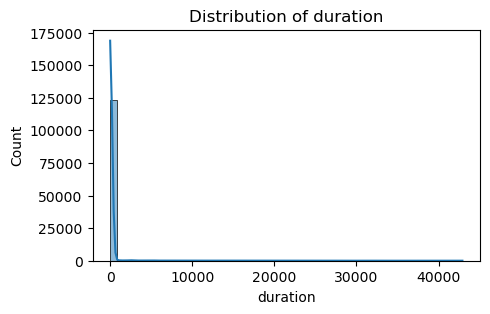

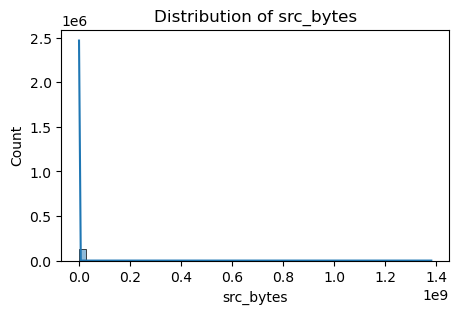

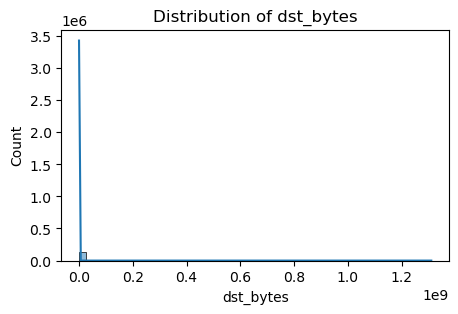

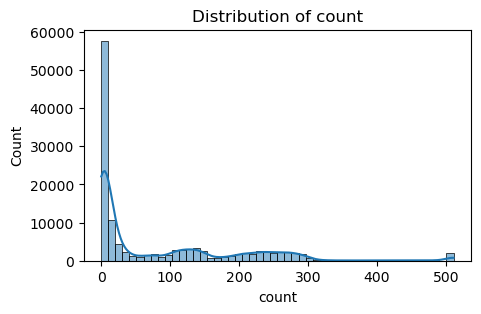

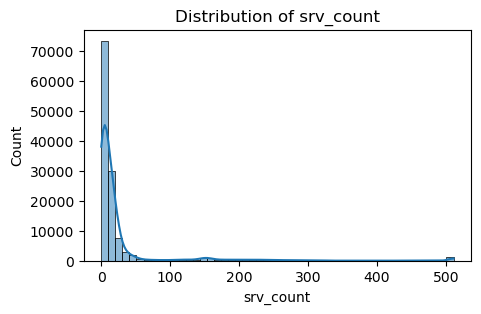

In [16]:
features_to_plot = ['duration','src_bytes','dst_bytes','count','srv_count']
for col in features_to_plot:
    plt.figure(figsize=(5,3))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
#numeric

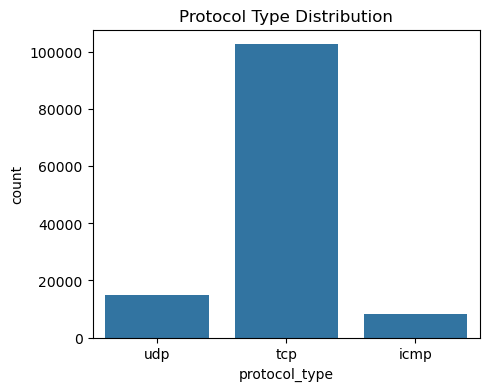

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='protocol_type', data=train_df)
plt.title("Protocol Type Distribution")
plt.show()


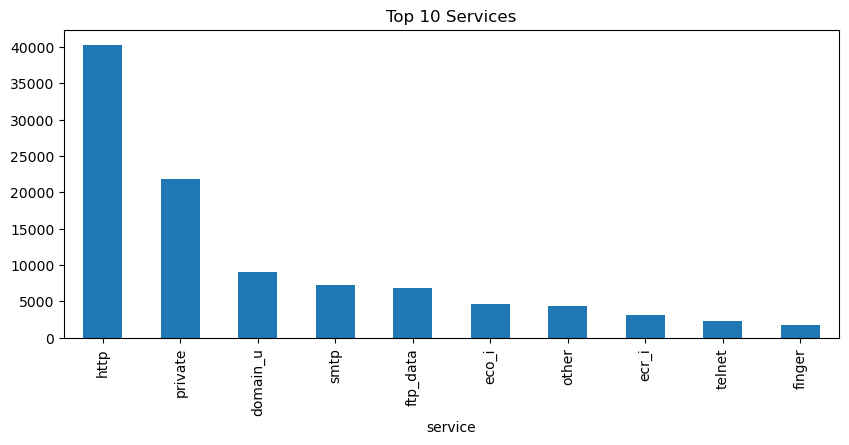

In [19]:
plt.figure(figsize=(10,4))
train_df['service'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Services")
plt.show()


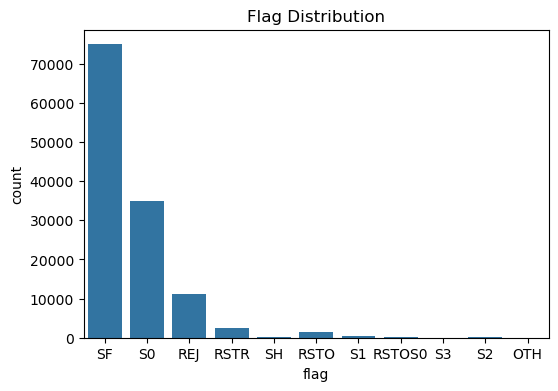

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='flag', data=train_df)
plt.title("Flag Distribution")
plt.show()


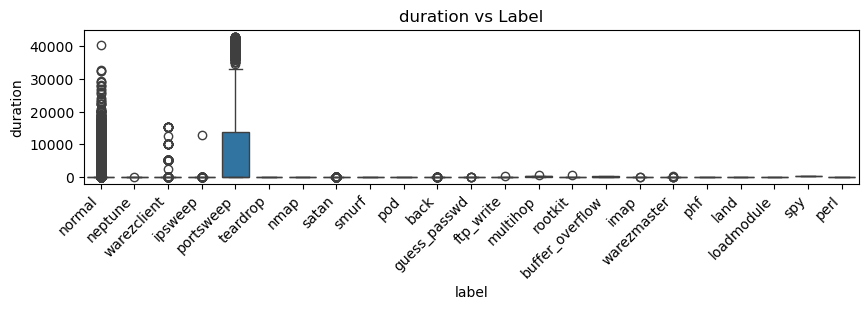

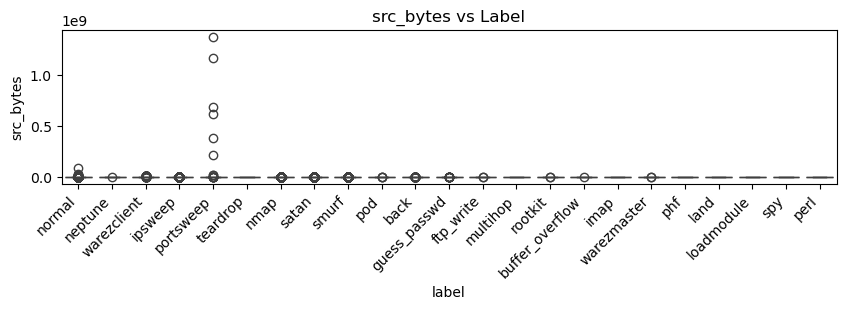

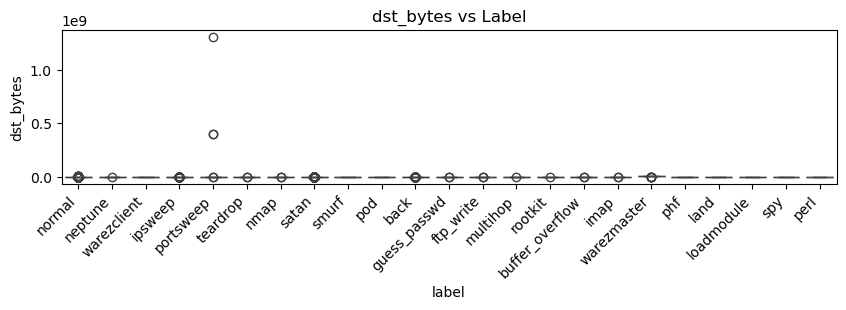

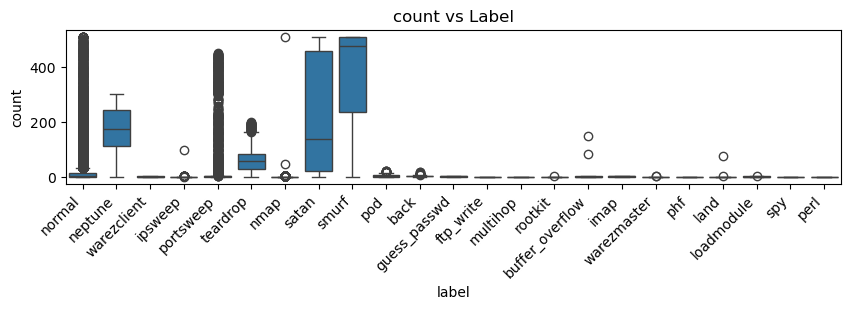

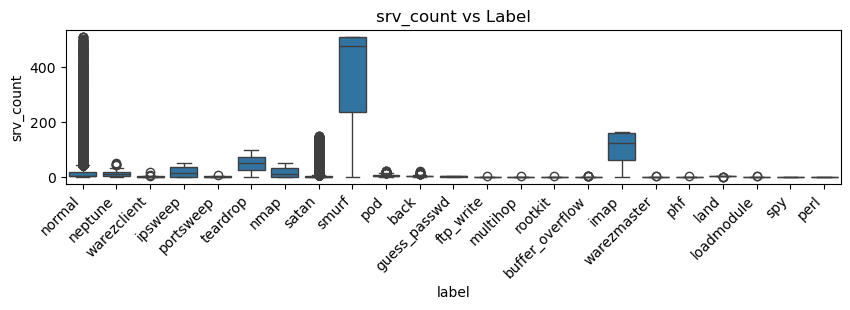

In [21]:
for col in features_to_plot:
    plt.figure(figsize=(10,2))
    sns.boxplot(x='label', y=col, data=train_df)
    plt.xticks(rotation=45, ha='right') 
    plt.title(f"{col} vs Label")
    plt.show()
#Bivariate Analysis

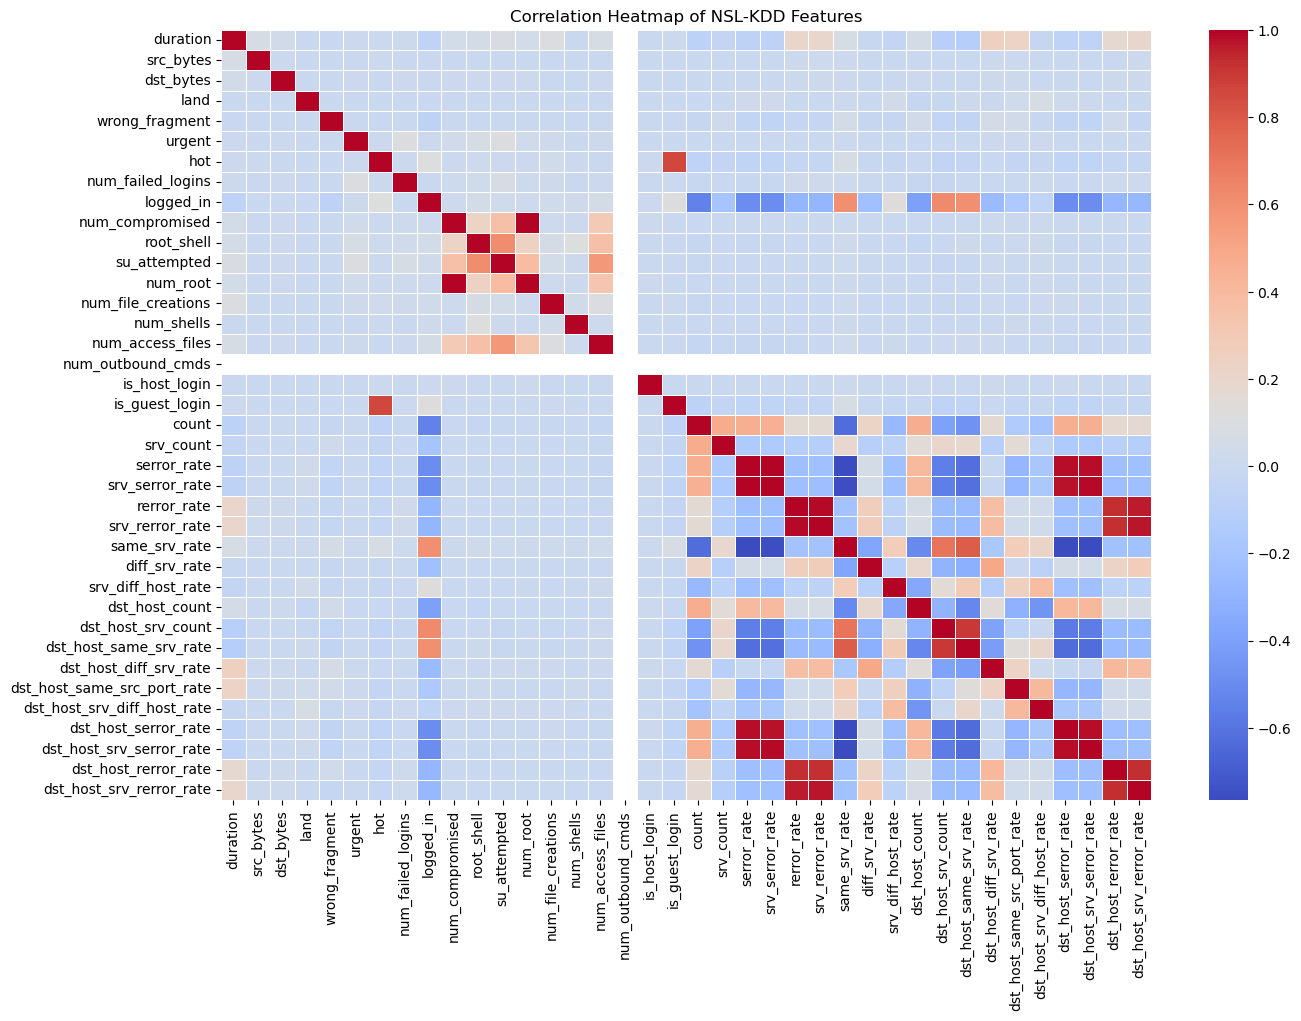

In [22]:
numeric_df = train_df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of NSL-KDD Features")
plt.show()

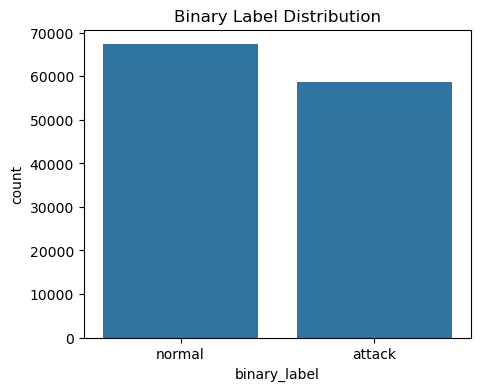

In [23]:
train_df['binary_label'] = train_df['label'].apply(
    lambda x: 'normal' if x == 'normal' else 'attack')
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x='binary_label')
plt.title("Binary Label Distribution")
plt.show()


**PREPROCESSING**

In [43]:
# Handle missing values (NaNs)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)


In [45]:
# 1. Feature Engineering (Train/Test separately)
# -------------------------
def feature_engineer(df):
    temp = df.copy()
    
    # Clean labels & binary target
    temp['label'] = temp['label'].str.strip('.').str.lower()
    temp['binary_target'] = temp['label'].apply(lambda x: 0 if x == 'normal' else 1)
    
    # Interaction features
    temp['total_bytes'] = temp['src_bytes'] + temp['dst_bytes']
    
    # Log transform skewed features
    temp['src_bytes_log'] = np.log1p(temp['src_bytes'])
    temp['dst_bytes_log'] = np.log1p(temp['dst_bytes'])
    
    return temp

train_proc = feature_engineer(train_df)
test_proc = feature_engineer(test_df)

In [47]:
#  Encode categorical columns safely
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(train_proc[col].astype(str))
    train_proc[col] = le.transform(train_proc[col].astype(str))
    # Transform test and handle unseen categories
    test_proc[col] = test_proc[col].astype(str).apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# 3. Prepare X and y safely
drop_cols = ['label', 'attack_category', 'difficulty_level', 'binary_label']  # ignore missing columns
X_train = train_proc.drop(columns=[c for c in drop_cols if c in train_proc.columns])
y_train = train_proc['binary_target']

X_test = test_proc.drop(columns=[c for c in drop_cols if c in test_proc.columns])
y_test = test_proc['binary_target']

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Feature Engineering & Scaling Done ")


 Feature Engineering & Scaling Done 


**MODELING**

In [50]:
# Train SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print(" SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


 SVM Accuracy: 0.9913942243712017

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9711
           1       1.00      0.99      0.99     12832

    accuracy                           0.99     22543
   macro avg       0.99      0.99      0.99     22543
weighted avg       0.99      0.99      0.99     22543

Confusion Matrix:
 [[ 9673    38]
 [  156 12676]]


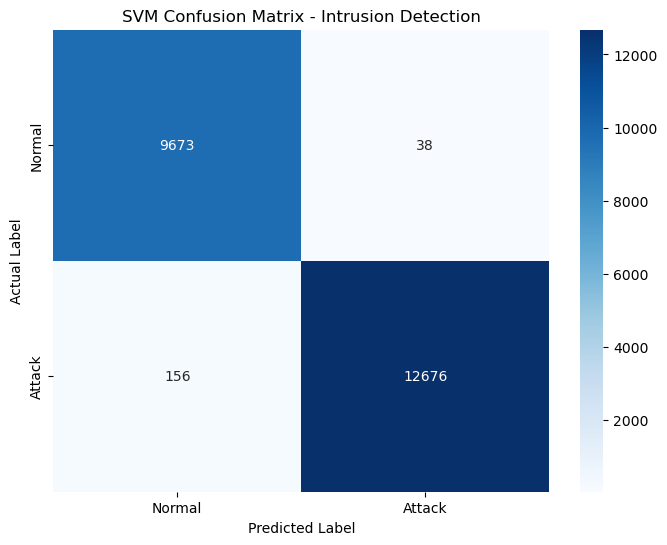

In [52]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'], 
            yticklabels=['Normal', 'Attack'])
plt.title('SVM Confusion Matrix - Intrusion Detection')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [54]:
# Overfitting Check
y_train_pred = svm_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)

#  TEST Accuracy 
test_acc = accuracy_score(y_test, y_pred_svm)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")


Train Accuracy: 1.0000
Test Accuracy : 0.9914


In [56]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Accuracy on Train:", accuracy_score(y_train, knn_model.predict(X_train_scaled)))
print("KNN Accuracy on Test:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy on Train: 0.9994760740482012
KNN Accuracy on Test: 0.8429224149403363

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      9711
           1       0.98      0.74      0.84     12832

    accuracy                           0.84     22543
   macro avg       0.86      0.86      0.84     22543
weighted avg       0.88      0.84      0.84     22543

Confusion Matrix:
 [[9559  152]
 [3389 9443]]


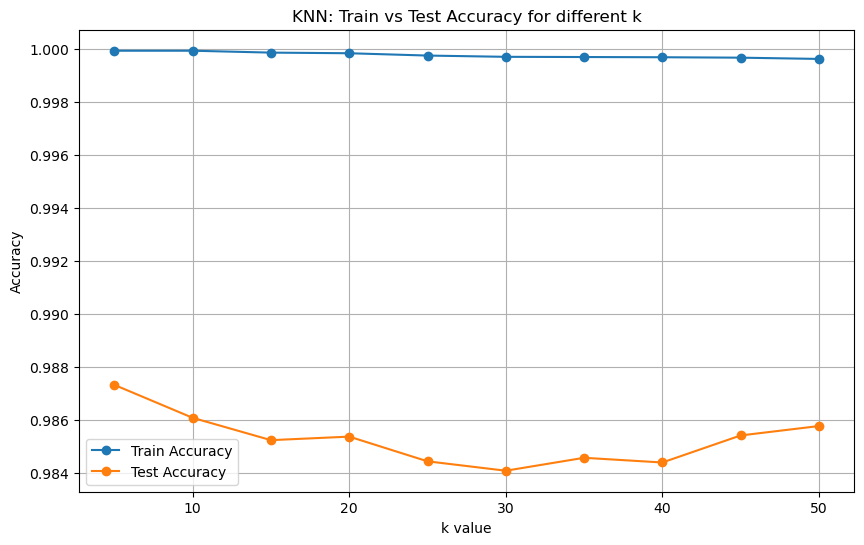

✅ Best k based on Test Accuracy: 5
Train Accuracy: 0.9999206172800305
Test Accuracy: 0.987313134897751

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9711
           1       1.00      0.98      0.99     12832

    accuracy                           0.99     22543
   macro avg       0.99      0.99      0.99     22543
weighted avg       0.99      0.99      0.99     22543

Confusion Matrix:
 [[ 9657    54]
 [  232 12600]]


In [57]:
# 1. Scaling with MinMax
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. GridSearch on k
k_values = list(range(5, 51, 5))
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
# 3. Plot Train vs Test accuracy
plt.figure(figsize=(10,6))
plt.plot(k_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Test Accuracy for different k')
plt.legend()
plt.grid(True)
plt.show()

# 4. Best k based on test accuracy
best_k = k_values[np.argmax(test_acc)]
print("✅ Best k based on Test Accuracy:", best_k)
print("Train Accuracy:", train_acc[np.argmax(test_acc)])
print("Test Accuracy:", test_acc[np.argmax(test_acc)])
# 5. Evaluate Best KNN
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_test_pred_best = knn_best.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_test_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))
